In [1]:
!pip install sentence-transformers pandas numpy matplotlib seaborn


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util


In [3]:
import pandas as pd

data = {
    "sentence1": [
        "A man is playing a guitar",
        "The cat is sleeping on the sofa",
        "A woman is cooking food",
        "Children are playing in the park",
        "He is driving a car"
    ],
    "sentence2": [
        "A person plays music",
        "An animal is resting",
        "Someone is preparing a meal",
        "Kids are outdoors playing",
        "A man is riding a vehicle"
    ]
}

df_pairs = pd.DataFrame(data)
df_pairs.to_csv("sentence_pairs.csv", index=False)
df_pairs


,sentence1,sentence2
0,A man is playing a guitar,A person plays music
1,The cat is sleeping on the sofa,An animal is resting
2,A woman is cooking food,Someone is preparing a meal
3,Children are playing in the park,Kids are outdoors playing
4,He is driving a car,A man is riding a vehicle


In [4]:
pairs_df = pd.read_csv("sentence_pairs.csv")
sentence_pairs = list(zip(pairs_df["sentence1"], pairs_df["sentence2"]))


In [5]:
from google.colab import files
files.download("sentence_pairs.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
models = {
    "all-MiniLM-L6-v2": "sentence-transformers/all-MiniLM-L6-v2",
    "all-mpnet-base-v2": "sentence-transformers/all-mpnet-base-v2",
    "paraphrase-MiniLM-L12-v2": "sentence-transformers/paraphrase-MiniLM-L12-v2",
    "distilbert-base-nli-stsb": "sentence-transformers/distilbert-base-nli-stsb-mean-tokens",
    "roberta-base-nli-stsb": "sentence-transformers/roberta-base-nli-stsb-mean-tokens"
}


In [7]:
results = []

for name, path in models.items():
    model = SentenceTransformer(path)
    start = time.time()
    scores = []
    for s1, s2 in sentence_pairs:
        e1 = model.encode(s1, convert_to_tensor=True)
        e2 = model.encode(s2, convert_to_tensor=True)
        scores.append(util.cos_sim(e1, e2).item())
    end = time.time()
    results.append([
        name,
        np.mean(scores),
        (end - start) * 1000,
        model.get_sentence_embedding_dimension()
    ])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/paraphrase-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

RobertaModel LOAD REPORT from: sentence-transformers/roberta-base-nli-stsb-mean-tokens
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/334 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
df = pd.DataFrame(results, columns=["Model", "STS_Score", "Inference_Time_ms", "Embedding_Dim"])
df["Model_Size_MB"] = [80, 420, 120, 255, 450]
df["Deployment_Ease"] = [5, 3, 4, 3, 2]
df


,Model,STS_Score,Inference_Time_ms,Embedding_Dim,Model_Size_MB,Deployment_Ease
0,all-MiniLM-L6-v2,0.545242,296.254635,384,80,5
1,all-mpnet-base-v2,0.568965,671.185970,768,420,3
2,paraphrase-MiniLM-L12-v2,0.471952,223.782063,384,120,4
3,distilbert-base-nli-stsb,0.611879,294.108629,768,255,3
4,roberta-base-nli-stsb,0.658853,594.209909,768,450,2


In [9]:
df.to_csv("decision_matrix.csv", index=False)


In [10]:
criteria = df.iloc[:, 1:].values.astype(float)
norm = criteria / np.sqrt((criteria ** 2).sum(axis=0))


In [11]:
weights = np.array([0.35, 0.20, 0.10, 0.15, 0.20])
weighted = norm * weights


In [12]:
benefit = np.array([1, 0, 0, 0, 1])

ideal_best = np.where(benefit == 1, weighted.max(axis=0), weighted.min(axis=0))
ideal_worst = np.where(benefit == 1, weighted.min(axis=0), weighted.max(axis=0))


In [13]:
d_pos = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
d_neg = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))
df["TOPSIS_Score"] = d_neg / (d_pos + d_neg)
df["Rank"] = df["TOPSIS_Score"].rank(ascending=False)
df.sort_values("Rank")


,Model,STS_Score,Inference_Time_ms,Embedding_Dim,Model_Size_MB,Deployment_Ease,TOPSIS_Score,Rank
0,all-MiniLM-L6-v2,0.545242,296.254635,384,80,5,0.801460,1.0
2,paraphrase-MiniLM-L12-v2,0.471952,223.782063,384,120,4,0.689708,2.0
3,distilbert-base-nli-stsb,0.611879,294.108629,768,255,3,0.576802,3.0
4,roberta-base-nli-stsb,0.658853,594.209909,768,450,2,0.281382,4.0
1,all-mpnet-base-v2,0.568965,671.185970,768,420,3,0.220303,5.0


In [14]:
df.sort_values("Rank").to_csv("ranking.csv", index=False)


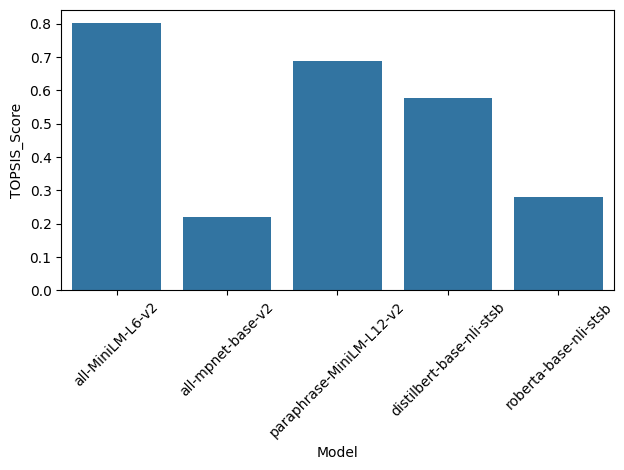

In [15]:
plt.figure()
sns.barplot(x="Model", y="TOPSIS_Score", data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("topsis_scores.png")
plt.show()


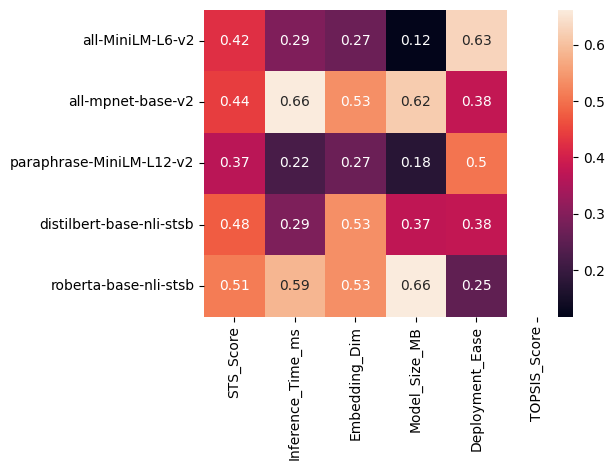

In [16]:
plt.figure()
sns.heatmap(norm, annot=True, xticklabels=df.columns[1:-1], yticklabels=df["Model"])
plt.tight_layout()
plt.savefig("normalized_heatmap.png")
plt.show()


In [17]:
df.to_csv("ranking.csv", index=False)
plt.savefig("topsis_scores.png")


<Figure size 640x480 with 0 Axes>

In [18]:
from google.colab import files

files.download("ranking.csv")
files.download("topsis_scores.png")
files.download("normalized_heatmap.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>